<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [44]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [45]:
df = pd.read_csv("Salaries.csv", skiprows=[1], index_col="playerID")
# 默认header是第一行，若不想要则为header=None
# skip_row = 3为跳过前三行，0，1，2
# skip_row = [3] 为跳过第3行，zero_index

In [48]:
df.head()
#看前五行

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000


In [52]:
df.columns

Index(['yearID', 'teamID', 'lgID', 'salary'], dtype='object')

In [53]:
df.keys

<bound method NDFrame.keys of            yearID teamID lgID    salary
playerID                               
bedrost01    1985    ATL   NL    550000
benedbr01    1985    ATL   NL    545000
campri01     1985    ATL   NL    633333
ceronri01    1985    ATL   NL    625000
chambch01    1985    ATL   NL    800000
...           ...    ...  ...       ...
treinbl01    2015    WAS   NL    512800
ugglada01    2015    WAS   NL    507500
werthja01    2015    WAS   NL  21000000
zimmejo02    2015    WAS   NL  16500000
zimmery01    2015    WAS   NL  14000000

[25574 rows x 4 columns]>

In [54]:
df.values

array([[1985, 'ATL', 'NL', 550000],
       [1985, 'ATL', 'NL', 545000],
       [1985, 'ATL', 'NL', 633333],
       ...,
       [2015, 'WAS', 'NL', 21000000],
       [2015, 'WAS', 'NL', 16500000],
       [2015, 'WAS', 'NL', 14000000]], shape=(25574, 4), dtype=object)

#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [16]:
df[((df["teamID"]=="ATL") | (df["teamID"]== "HOU"))& (df["salary"] > 100000)]

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
singljo02,2015,HOU,AL,2000000
sippto01,2015,HOU,AL,2400000
springe01,2015,HOU,AL,512900


#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [17]:
df[df["teamID"] == "ATL"]["salary"].describe()

count    8.850000e+02
mean     2.207749e+06
std      3.434320e+06
min      6.000000e+04
25%      3.000000e+05
50%      6.000000e+05
75%      2.400000e+06
max      1.606180e+07
Name: salary, dtype: float64

In [30]:
df[df["teamID"]== "ATL"]["salary"]>100000

playerID
bedrost01    True
benedbr01    True
campri01     True
ceronri01    True
chambch01    True
             ... 
simmoan01    True
teherju01    True
terdojo01    True
woodal02     True
younger03    True
Name: salary, Length: 885, dtype: bool

#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [36]:
data_dict = {col: [] for col in df.columns}
for _,row in df.iterrows():
    for col in df.columns:
        
        data_dict[col].append(row[col])
        # print(row)
'''df.columns → 列名

iterrows() → (index, Series)

row[col] → 访问某一列的值
'''

'df.columns → 列名\n\niterrows() → (index, Series)\n\nrow[col] → 访问某一列的值\n'

In [69]:
df.to_dict()
# 默认是df.to_dict("dict")，以这个表的index为key，之前设置了df = pd.read_csv("Salary.csv",skip_row = [1], index_col = "playerID")

{'yearID': {'bedrost01': 1995,
  'benedbr01': 1989,
  'campri01': 1986,
  'ceronri01': 1992,
  'chambch01': 1986,
  'dedmoje01': 1988,
  'forstte01': 1986,
  'garbege01': 1988,
  'harpete01': 1987,
  'hornebo01': 1988,
  'hubbagl01': 1988,
  'mahleri01': 1990,
  'mcmurcr01': 1995,
  'mumphje01': 1988,
  'murphda05': 1993,
  'oberkke01': 1991,
  'perezpa01': 1991,
  'perryge01': 1995,
  'ramirra01': 1992,
  'suttebr01': 1990,
  'washicl01': 1990,
  'boddimi01': 1993,
  'dauerri01': 1985,
  'davisst02': 1994,
  'dempsri01': 1992,
  'dwyerji01': 1990,
  'flanami01': 1992,
  'fordda01': 1986,
  'grosswa01': 1986,
  'lacyle01': 1987,
  'lynnfr01': 1990,
  'martide01': 1998,
  'martiti01': 1986,
  'mcgresc01': 1988,
  'murraed02': 1997,
  'nolanjo01': 1985,
  'rayfofl01': 1987,
  'ripkeca01': 2001,
  'roeniga01': 1988,
  'sheetla01': 1990,
  'shelbjo01': 1991,
  'stewasa01': 1987,
  'youngmi01': 1989,
  'armasto01': 1989,
  'barrema02': 1990,
  'boggswa01': 1999,
  'bordiri01': 1986,
  'boyd

In [58]:
df.to_dict(orient = "list")

{'yearID': [1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985,
  1985

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [70]:
f = pd.DataFrame(data_dict)
f.columns = ["a","b","c","d"]

In [71]:
f

,a,b,c,d
0,1985,ATL,NL,550000
1,1985,ATL,NL,545000
2,1985,ATL,NL,633333
3,1985,ATL,NL,625000
4,1985,ATL,NL,800000
...,...,...,...,...
25569,2015,WAS,NL,512800
25570,2015,WAS,NL,507500
25571,2015,WAS,NL,21000000
25572,2015,WAS,NL,16500000


In [68]:
["a","b","c","d"][:3]

['a', 'b', 'c']

In [72]:
f.index = df.index

In [73]:
f

,a,b,c,d
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [77]:
ls = [[1,2,3],[3,4,5]]
arr = np.array(ls)
arr

array([[1, 2, 3],
       [3, 4, 5]])

#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [80]:
arr.ndim
#几维数组

2

In [81]:
arr.shape

(2, 3)

In [82]:
arr.size

6

In [83]:
arr.dtype

dtype('int64')

In [87]:
arr.itemsize
#一个元素占几个字节
'''int64 = 8 bytes

float64 = 8 bytes

int32 = 4 bytes
'''

SyntaxError: invalid character '‘' (U+2018) (3811576545.py, line 3)

In [86]:
arr.data

#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [91]:
arr = np.arange(1,5)
arr

array([1, 2, 3, 4])

In [95]:
arr = np.arange(2,8).reshape(2,3)
arr

array([[2, 3, 4],
       [5, 6, 7]])

In [105]:
arr.flatten()
# flatten和reshpae都不改变数组

array([[2, 3, 4],
       [5, 6, 7]])

In [103]:
arr.reshape(3, -1)
# 自动推断形状

array([[2, 3],
       [4, 5],
       [6, 7]])

In [104]:
arr

array([[2, 3, 4],
       [5, 6, 7]])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [101]:
arr[1:]

array([[5, 6, 7]])

#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [106]:
np.argmin(arr)

np.int64(0)

In [116]:
arr = np.arange(24).reshape(3,2,4)
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [142]:
arr1 = np.random.rand(2,3,4)
arr2 = np.random.rand(4,)
arr3 = np.random.rand(3,4,3)
# 默认为（4，1）
# 必须是arr2.shape[-2]==arr1.shape[-1]
arr1

array([[[0.36451045, 0.38359108, 0.8107729 , 0.11263482],
        [0.76424344, 0.9290412 , 0.63725331, 0.84530976],
        [0.13893949, 0.18907677, 0.31044507, 0.24838831]],

       [[0.86945075, 0.4803274 , 0.66229632, 0.6386896 ],
        [0.54476753, 0.67785061, 0.27568557, 0.77622663],
        [0.95572972, 0.88607542, 0.61252764, 0.31446999]]])

In [137]:
np.dot(arr1,arr3)

array([[[[1.71291837, 1.41289088, 1.34446937],
         [1.66320676, 1.89027963, 0.97725044],
         [1.96761292, 1.28299996, 1.31621829]],

        [[1.67251537, 1.33330133, 1.20181994],
         [1.01517961, 1.24024482, 0.8072542 ],
         [1.34165587, 0.77396283, 0.77012642]],

        [[1.17990983, 0.91072075, 1.18849995],
         [1.08961357, 1.22169116, 0.63386715],
         [0.99594739, 0.60137657, 0.86359031]]],


       [[[0.77239914, 0.68374022, 0.58225132],
         [0.38150074, 0.51650979, 0.75014865],
         [0.51412991, 0.28022345, 0.30053211]],

        [[1.86237979, 1.5645103 , 1.16807075],
         [1.10611989, 1.39088649, 1.13081094],
         [1.67130981, 1.00371661, 0.84430736]],

        [[0.93045314, 0.69759493, 0.86301379],
         [0.66699577, 0.76984866, 0.38829502],
         [0.64189214, 0.35230039, 0.51464684]]]])

In [133]:
np.dot(arr1,arr2)

array([[0.73105809, 0.74399626, 0.93598666],
       [1.33670267, 1.33496604, 0.93863471]])

In [114]:
np.argmax(arr,axis = 0)

array([[2, 2, 2, 2],
       [2, 2, 2, 2]])

In [120]:
np.max(arr,axis=0)
# （0，8，16）里面最大的是16，对于21，（5，13，21）之中最大的是21，因为这些数字都是第2行第二列，只是块不同
# 对每个 (row, col) 位置，取 3 个 block 中的最大值
# 把第0维的块压缩

array([[16, 17, 18, 19],
       [20, 21, 22, 23]])

In [143]:
np.mod(arr1,2)

array([[[0.36451045, 0.38359108, 0.8107729 , 0.11263482],
        [0.76424344, 0.9290412 , 0.63725331, 0.84530976],
        [0.13893949, 0.18907677, 0.31044507, 0.24838831]],

       [[0.86945075, 0.4803274 , 0.66229632, 0.6386896 ],
        [0.54476753, 0.67785061, 0.27568557, 0.77622663],
        [0.95572972, 0.88607542, 0.61252764, 0.31446999]]])

In [118]:
np.max(arr,axis = 1)

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [119]:
np.max(arr,axis = 2)

array([[ 3,  7],
       [11, 15],
       [19, 23]])

In [110]:
np.min(arr)

np.int64(2)

In [121]:
np.mean(arr, axis = 0)
# (0,8,16),(1,9,17)...

array([[ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [144]:
np.arange(2,8,2)

array([2, 4, 6])

In [146]:
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [147]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [148]:
np.eye(4)
# 对角矩阵

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [150]:
np.linspace(0,1,5)
# 等间距，0到1，一共5个数

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [151]:
np.linspace(0,4,4)

array([0.        , 1.33333333, 2.66666667, 4.        ])

### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

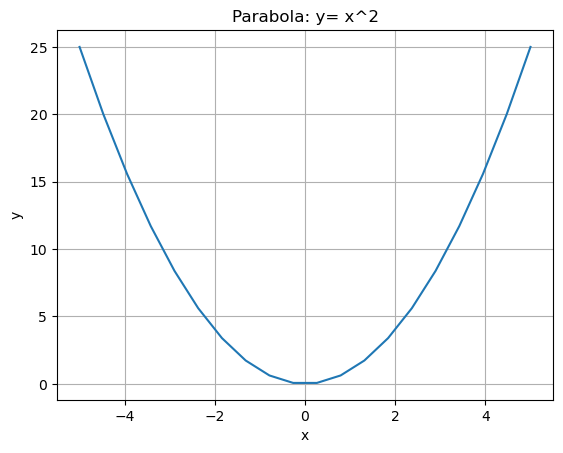

In [157]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5,5,num=20)
y = np.array([j**2 for j in x])
plt.plot(x,y)
plt.title("Parabola: y= x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

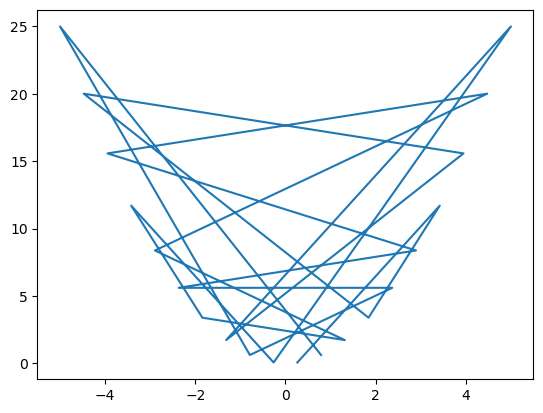

In [160]:
x = np.linspace(-5,5,num = 20)
np.random.shuffle(x)
y = np.array([j**2 for j in x])
plt.plot(x,y)
plt.show()

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

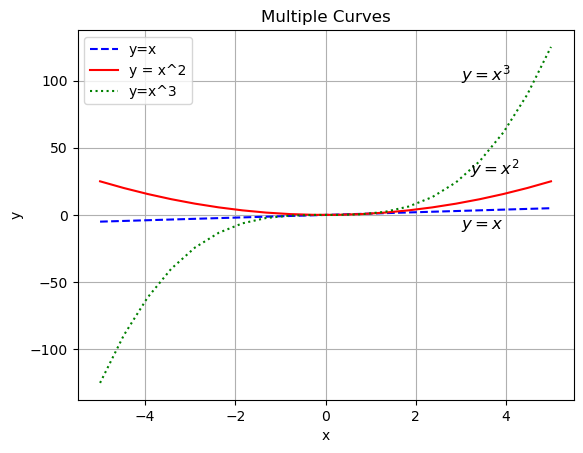

In [174]:
x = np.linspace(-5,5,num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j **3 for j in x])
plt.plot(x, y1,'b--',label='y=x')
plt.plot(x,y2, 'r-', label = 'y = x^2')
plt.plot(x,y3,'g:', label = 'y=x^3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Curves')
plt.legend() # 显示标注

plt.text(3,100,r'$y = x^3$', fontsize = 12)
plt.text(3.2,30, r'$y = x^2$', fontsize = 12)
plt.text(3,-10,r'$y = x$', fontsize = 12)

plt.grid(True)
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

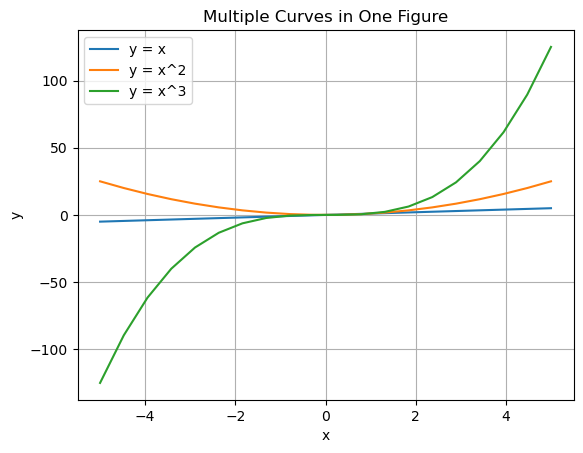

In [170]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

# plot all curves in ONE figure
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = x^2')
plt.plot(x, y3, label='y = x^3')

# add labels, title, legend, grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Curves in One Figure')
plt.legend()
plt.grid(True)

plt.show()


(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

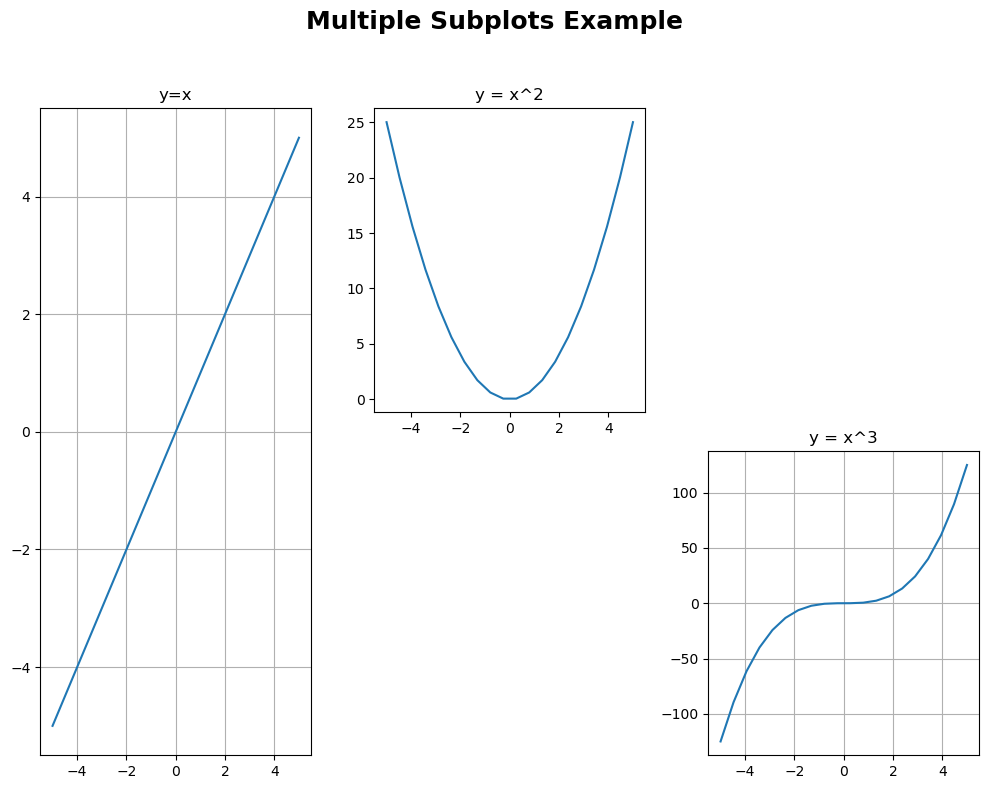

In [182]:
x = np.linspace(-5, 5 , num= 20)
y1 = np.array([j for j in x])
y2 = np.array([j**2 for j in x])
y3 = np.array([j**3 for j in x])

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Multiple Subplots Example',fontsize = 18, fontweight = 'bold')

plt.subplot(1,3,1)
# 一行三列第一个
plt.plot(x,y1)
plt.title('y=x')
plt.grid(True)

plt.subplot(2,3,2)
# 两行三列第二个
plt.plot(x,y2)
plt.title('y = x^2')

plt.subplot(2,3,6)
# 两行三列第六个
plt.title('y = x^3')
plt.plot(x,y3)
plt.grid(True)

plt.tight_layout(rect = [0,0,1,0.95])
plt.show()




(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

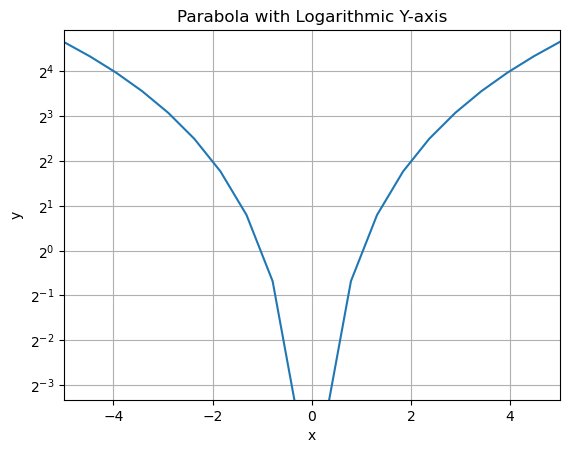

In [184]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.plot(x, y)

plt.xlim(-5,5)
plt.ylim(0.1,30)

plt.yscale('log', base=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Parabola with Logarithmic Y-axis")
plt.grid(True)

plt.show()



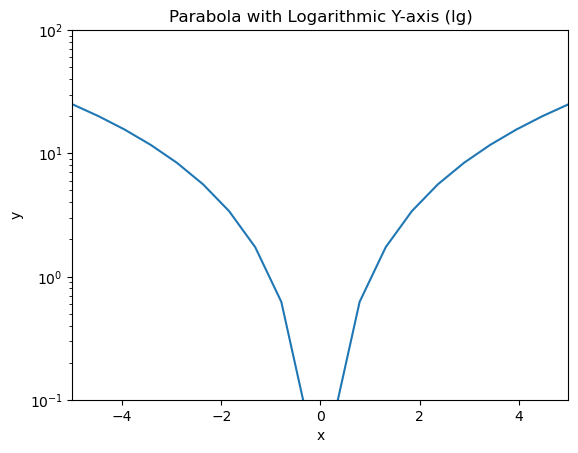

In [185]:
np.linspace(-5, 5, num = 20)
np.array([j**2 for j in x])

plt.plot(x,y)
plt.xlim(-5,5)
plt.ylim(0.1, 100)

plt.yscale('log')
# 默认base = 10
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parabola with Logarithmic Y-axis (lg)')
plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

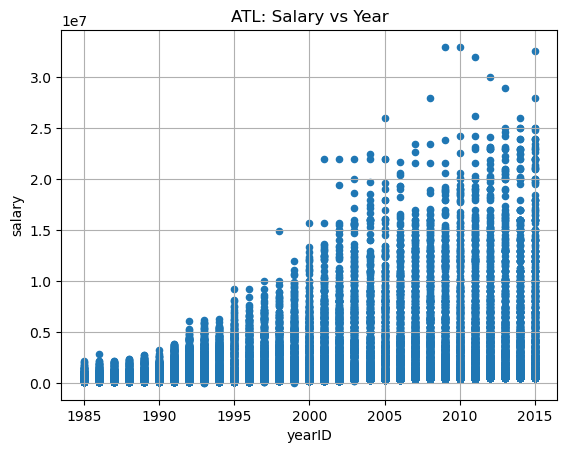

In [197]:
import pandas as pd
df = pd.read_csv('Salaries.csv', index_col = 'playerID', skiprows = [1])
df[df['teamID']=='ATL']
df.plot(
    kind = 'scatter',
    x = 'yearID',
    y= 'salary',
    title = 'ATL: Salary vs Year',
    grid= True
)
plt.show()


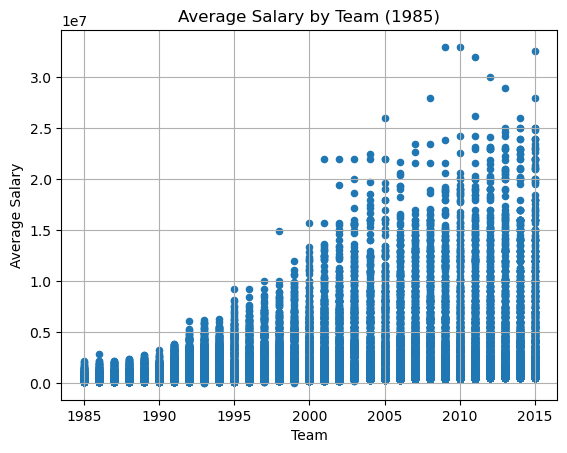

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


In [202]:
# 法二： 分开写
df.plot(kind="scatter",
        x='yearID',
        y ='salary'
       )
plt.title("Average Salary by Team (1985)")
plt.ylabel("Average Salary")
plt.xlabel("Team")
plt.grid(True)

plt.show()
df

(b) For year 1985, plot a bar chart to show the average salary for each team.

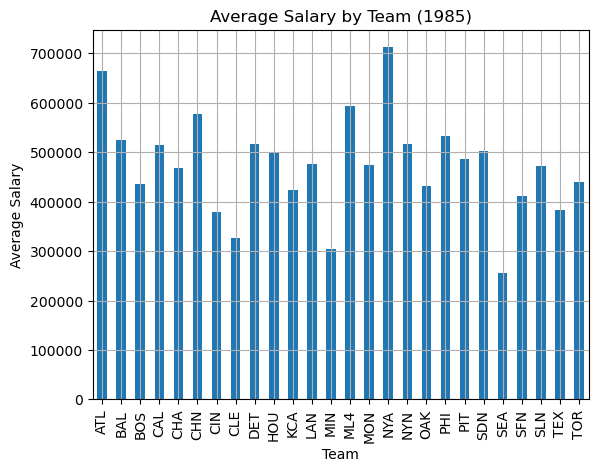

,yearID,teamID,lgID,salary
playerID,,,,
bedrost01,1985,ATL,NL,550000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


In [219]:
df=pd.read_csv('Salaries.csv', skiprows=[1], index_col = 'playerID')
df_1985 = df[df['yearID']==1985]
avg = df_1985['salary'].mean()
avg_team = df_1985.groupby('teamID')['salary'].mean()
avg
avg_team
avg_team.plot(kind = 'bar',
             title='Average Salary by Team (1985)',
             ylabel='Average Salary',
              xlabel='Team',
              grid = True
        )
plt.show()
df

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

<Axes: title={'center': 'annual average salary change by years'}, xlabel='year', ylabel='salary'>

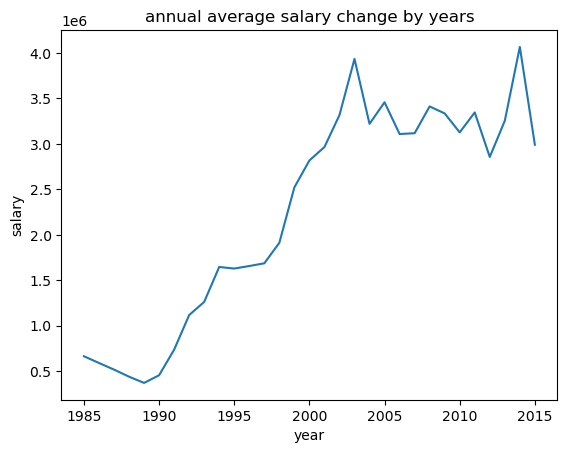

In [230]:
df_ATL = df[df['teamID']== 'ATL']
avg_salary = df_ATL.groupby('yearID')['salary'].mean()
avg_salary
avg_salary.plot(kind= 'line',
               xlabel = 'year',
               ylabel = 'salary',
               title = 'annual average salary change by years')

# plt.show()

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

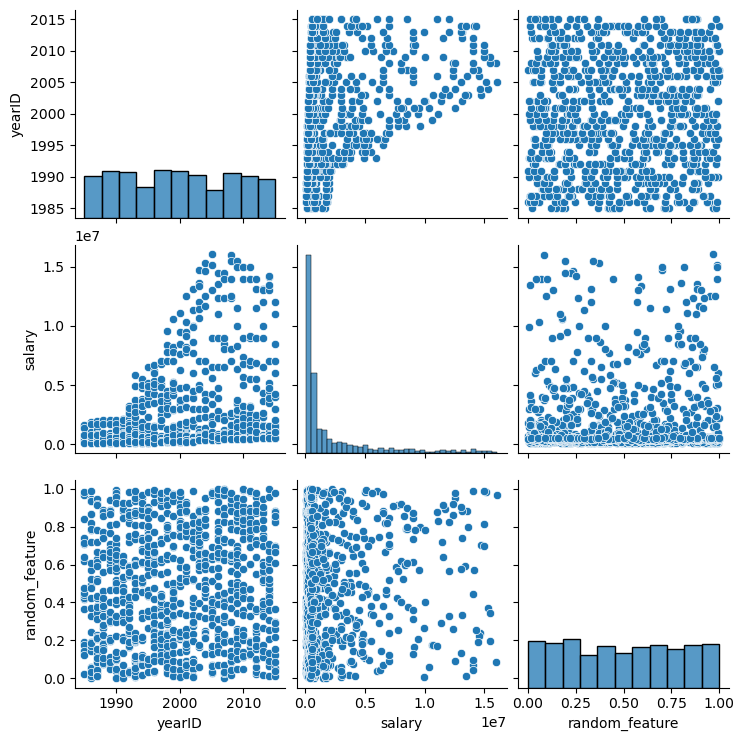

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 添加一个新的数值特征（随机生成）
df["random_feature"] = np.random.rand(len(df))

# 2. 筛选 ATL 球队
df_ATL = df[df["teamID"] == "ATL"]

# 3. pairplot 只能画数值型,所以只保留数值型特征（非常重要） 忽略teamID,playerID
numeric_df_ATL = df_ATL.select_dtypes(include=[np.number])

# 4. 用 seaborn 画 pairplot
# 子图 → 两个特征的关系
# 用来：看相关性, 看分布, 看异常值
sns.pairplot(numeric_df_ATL)

plt.show()


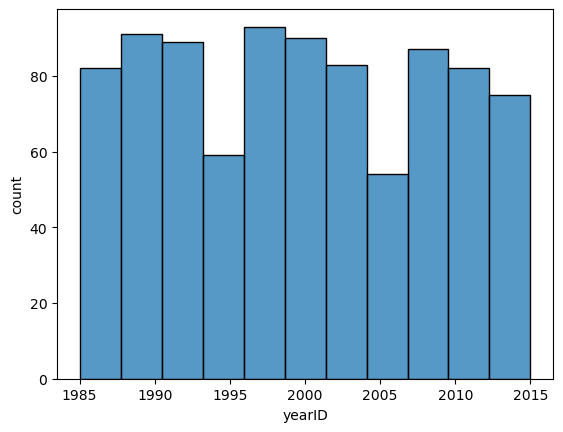

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_ATL["yearID"])
plt.xlabel("yearID")
plt.ylabel("count")
plt.show()


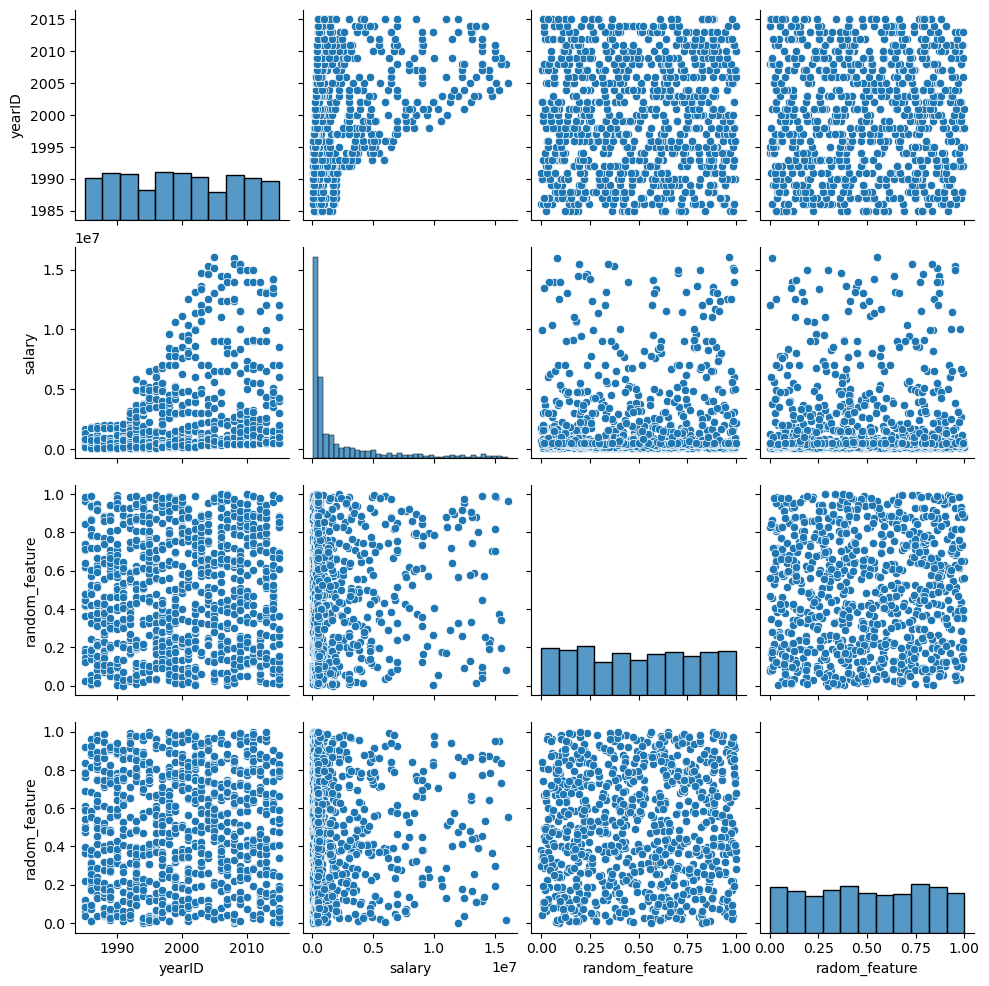

In [235]:
# 练习
import seaborn as sns
df['radom_feature'] = np.random.rand(len(df))
df_ATL = df[df['teamID']== 'ATL']
n_df = df_ATL.select_dtypes(include=[np.number])
sns.pairplot(n_df)

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

<Axes: xlabel='teamID', ylabel='salary'>

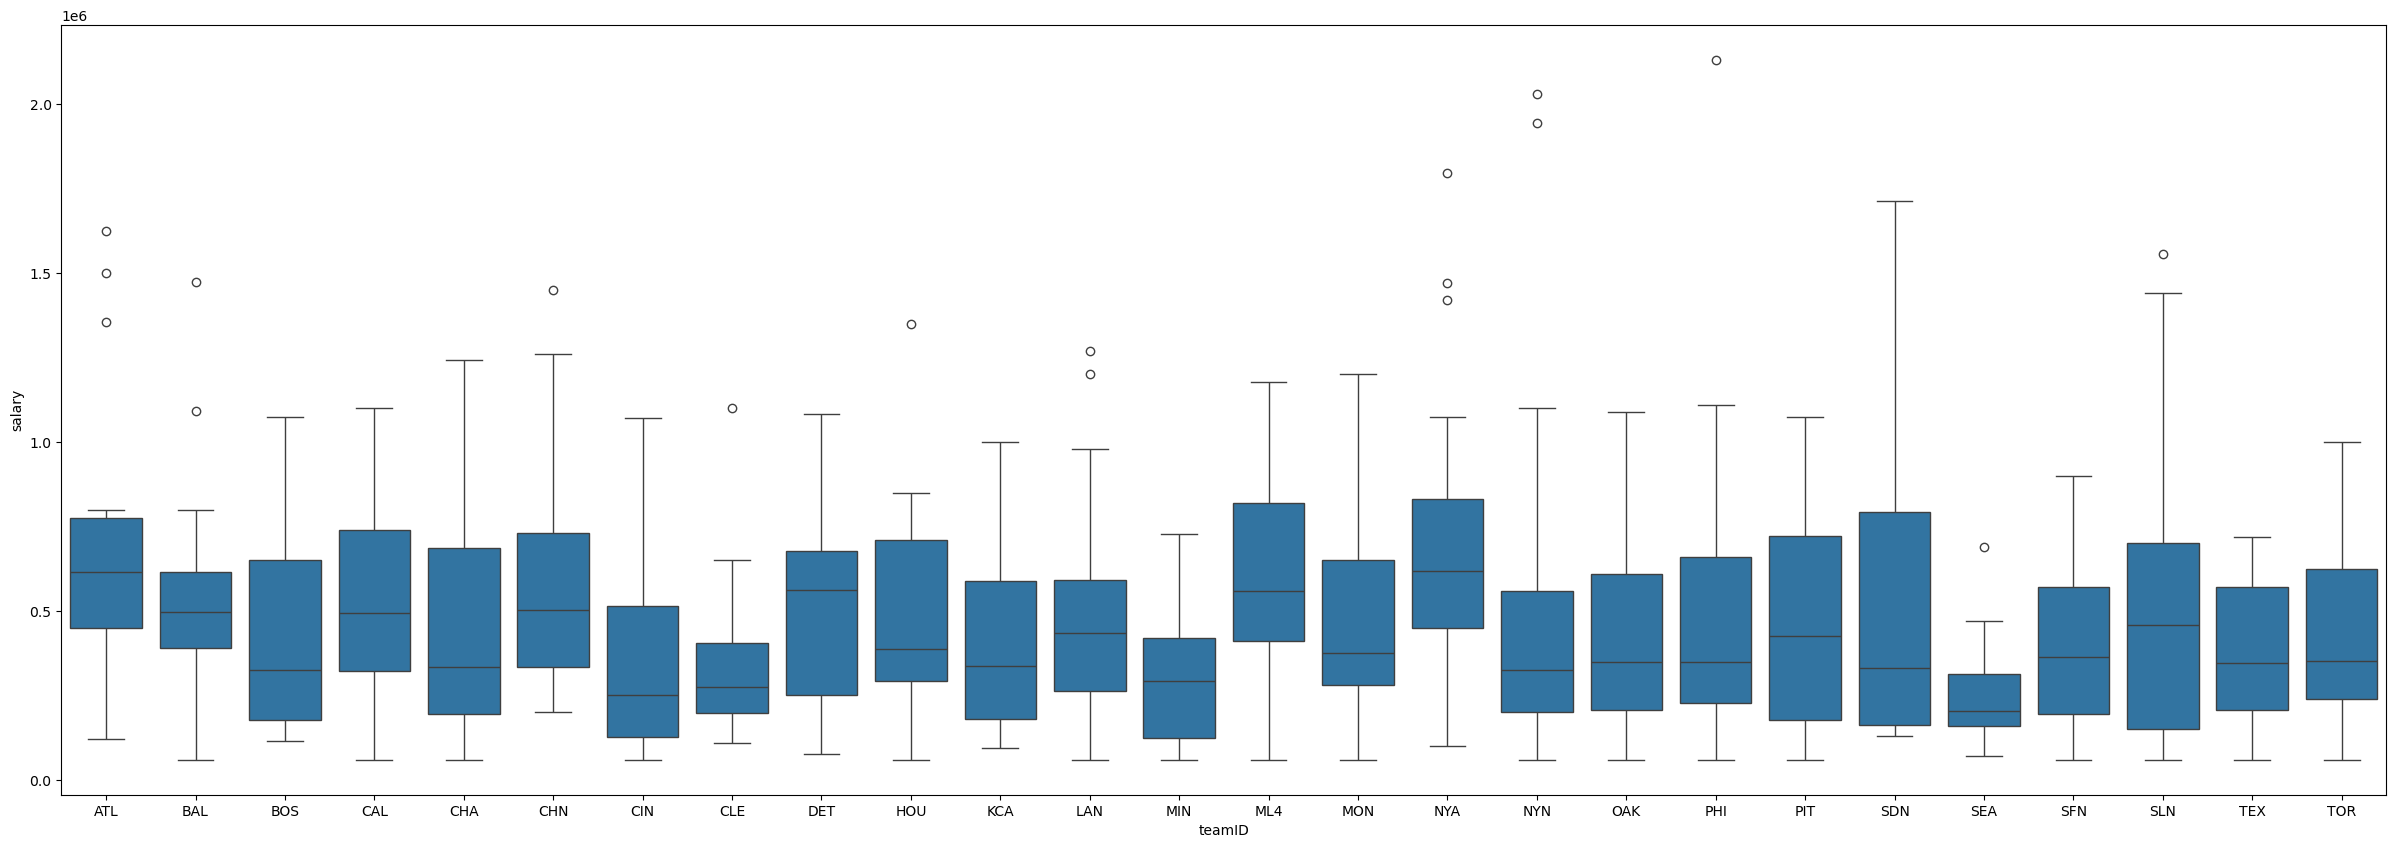

In [245]:
import seaborn as sns
df_1985 = df[df['yearID'] == 1985]
plt.figure(figsize=(30, 10))
sns.boxplot(df_1985,x = 'teamID', y = 'salary')


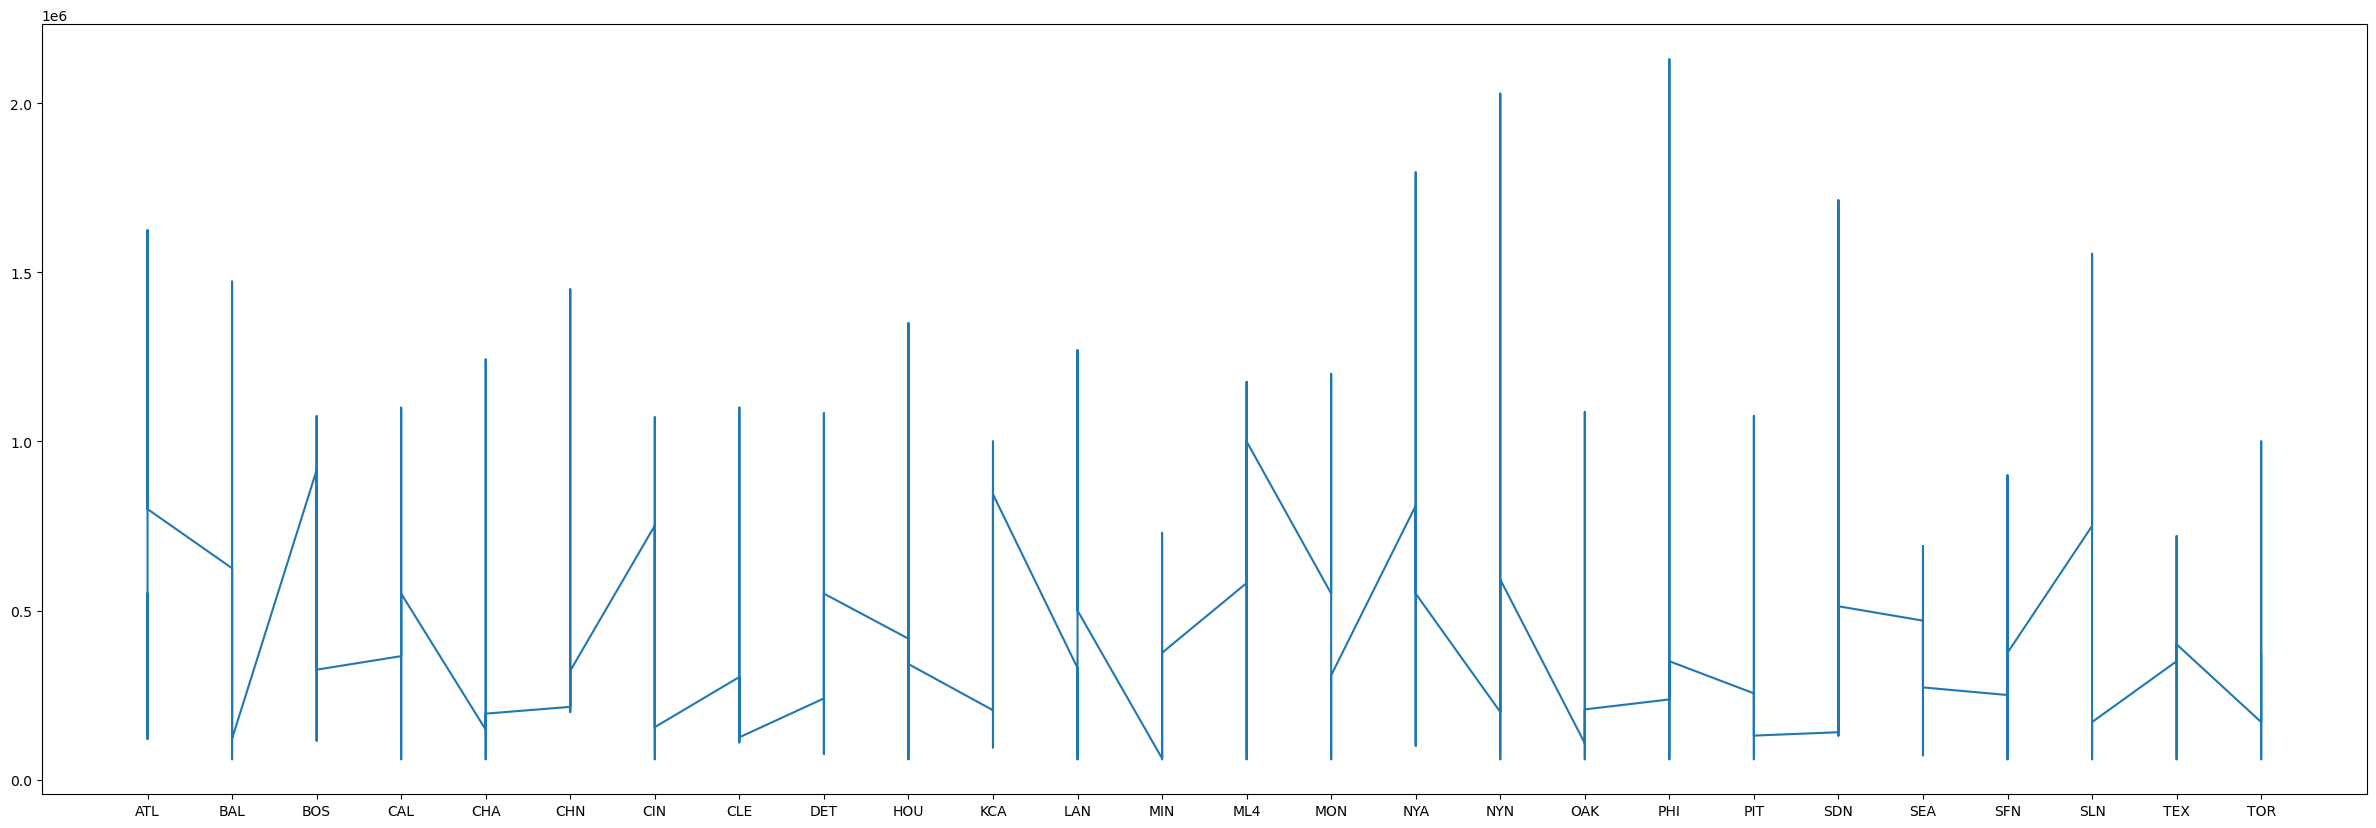

In [251]:
import seaborn as sns
df_1985 = df[df['yearID'] == 1985]
plt.figure(figsize=(30, 10))
plt.plot(df_1985['teamID'], df_1985['salary'])

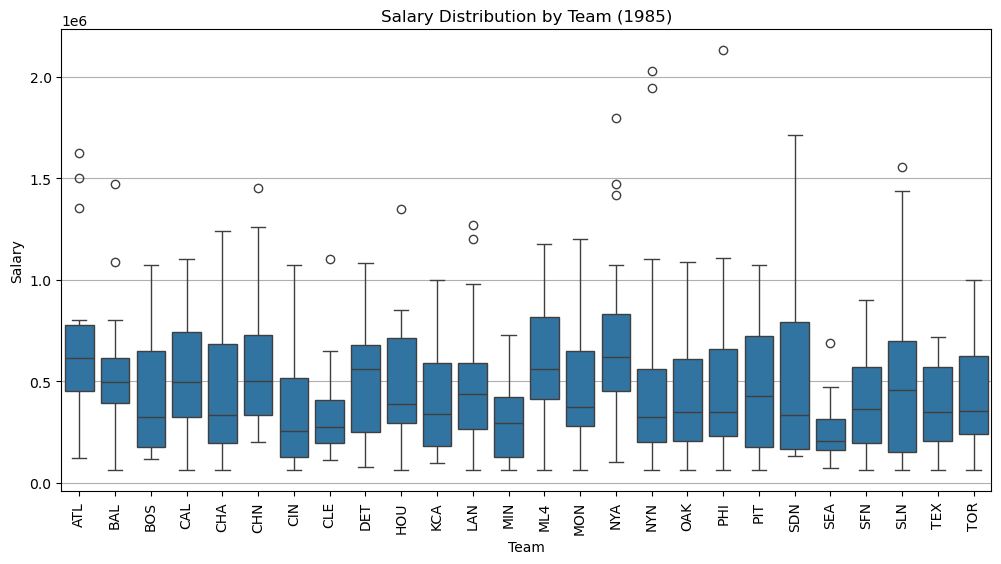

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 筛选 1985 年
df_1985 = df[df["yearID"] == 1985]

# 2. 画 boxplot
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df_1985,
    x="teamID",
    y="salary"
)

plt.title("Salary Distribution by Team (1985)")
plt.xlabel("Team")
plt.ylabel("Salary")
plt.xticks(rotation=90)   # 团队多，防止重叠
# 把 x 轴刻度标签旋转 90 度（竖着显示
plt.grid(True, axis="y")
# 只画y方向的线

plt.show()


(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

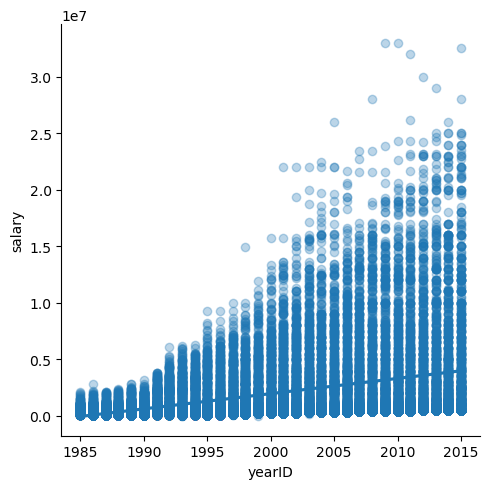

In [253]:
import seaborn as sns

# 加一条回归线
sns.lmplot(
    data=df,
    x="yearID",
    y="salary",
    scatter_kws={"alpha": 0.3}
)


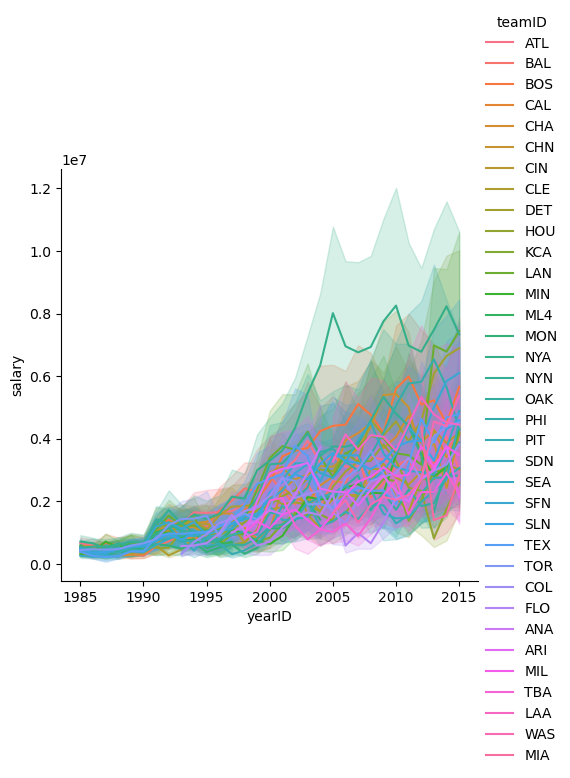

In [254]:
# 数值变量之间的关系
sns.relplot(
    data=df,
    x="yearID",
    y="salary",
    kind="line",
    hue="teamID"
)

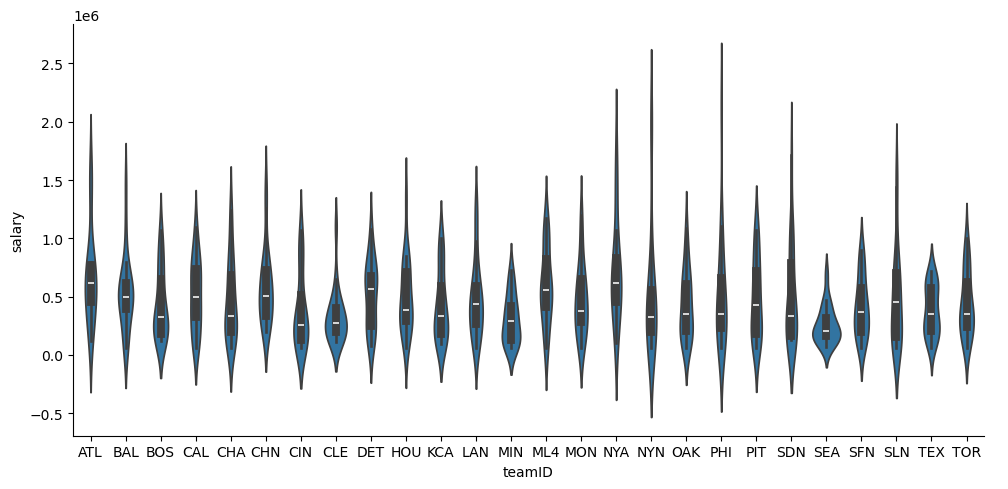

In [257]:
df_1985 = df[df["yearID"] == 1985]

sns.catplot(
    data=df_1985,
    x="teamID",
    y="salary",
    kind="violin", # bar, box
    height=5,
    aspect=2
)


### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.